# Dataset Description

## The dataset contains information about road traffic accidents with the following columns:

`Time`: Time of the accident

`Day_of_week`: Day of the week when the accident occurred

`Age_band_of_driver`: Age group of the driver

`Sex_of_driver`: Gender of the driver

`Educational_level`: Educational level of the driver

`Vehicle_driver_relation`: Relationship of the driver to the vehicle

`Driving_experience`: Driving experience of the driver

`Type_of_vehicle`: Type of vehicle involved in the accident

`Owner_of_vehicle`: Owner of the vehicle

`Service_year_of_vehicle`: Service years of the vehicle

`Area_accident_occured`: Area where the accident occurred

`Lanes_or_Medians`: Lanes or medians at the accident site

`Road_allignment`: Road alignment at the accident site

`Types_of_Junction`: Type of junction at the accident site

`Road_surface_type`: Type of road surface at the accident site

`Road_surface_conditions`: Road surface conditions at the accident site

`Light_conditions`: Light conditions at the time of the accident

`Weather_conditions`: Weather conditions at the time of the accident

`Type_of_collision`: Type of collision

`Number_of_vehicles_involved`: Number of vehicles involved in the accident

`Number_of_casualties`: Number of casualties in the accident

`Vehicle_movement`: Movement of the vehicle during the accident

`Casualty_class`: Class of casualty (driver, passenger, pedestrian)

`Sex_of_casualty`: Gender of the casualty

`Age_band_of_casualty`: Age group of the casualty

`Casualty_severity`: Severity of the casualty

`Work_of_casuality`: Occupation of the casualty

`Fitness_of_casuality`: Fitness of the casualty

`Pedestrian_movement`: Movement of the pedestrian

`Cause_of_accident`: Cause of the accident

`Accident_severity`: Severity of the accident


# Tasks

## Data Cleaning

### Read the dataset

In [1]:
# 1st step we will import pandas and read the csv file
import pandas as pd
df = pd.read_csv('TaskDataSet/Task (1) Dataset.csv')

In [2]:
# 2nd step we take a look at the data
print(df.head())
print(df.info())
print(df.describe())
print(df.shape)

       Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Abov

### Handle Missing Values

In [3]:
# 3rd step we will check for duplicated rows if any
duplicates = df.duplicated().sum()
print(duplicates)
# good there are no duplicates

0


In [4]:
# 4th step we will check for null values
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [5]:
# 5th we will drop the unnecessary columns
# seems like there many nulls in the data, we will drop the unnecessary columns
# we see that the column 'Fitness_of_casuality' is not needed so we will drop it
df = df.drop(['Fitness_of_casuality'], axis=1)
# and also we don't need the 'Work_of_casuality' column
df = df.drop(['Work_of_casuality'], axis=1)
# and also we don't need the 'Vehicle_driver_relation' column
df = df.drop(['Vehicle_driver_relation'], axis=1)
# and also we don't need the 'Owner_of_vehicle' column
df = df.drop(['Owner_of_vehicle'], axis=1)

In [6]:
# 6th step we will fill the null values
# we will fil the null values in the 'Educational_level' column with the mode
df['Educational_level'] = df['Educational_level'].fillna(df['Educational_level'].mode()[0])

In [7]:
# next the 'Type_of_vehicle' column
# we will fill the null values with the unknown
df['Type_of_vehicle'] = df['Type_of_vehicle'].fillna('Unknown')
# next the 'Types_of_Junction' column
# we will fill the null values with the mode
df['Types_of_Junction'] = df['Types_of_Junction'].fillna(df['Types_of_Junction'].mode()[0])
# next the 'Driving_experience' column
# we will fill the null values with the mode
df['Driving_experience'] = df['Driving_experience'].fillna(df['Driving_experience'].mode()[0])
# next the 'Service_year_of_vehicle' column
# we will fill the null values with the mode
df['Service_year_of_vehicle'] = df['Service_year_of_vehicle'].fillna(df['Service_year_of_vehicle'].mode()[0])

In [8]:
df['Defect_of_vehicle'].value_counts()
# we can see that almost all the values are 'No defect' so we will drop this column because it will not add any value to the model
df = df.drop(['Defect_of_vehicle'], axis=1)

In [9]:
df['Area_accident_occured'].isnull().sum()
# we can see that the 'Area_accident_occured' has just 233 null values we will not fill them
# because it's related to the location so we will drop all null rows
df = df.dropna(subset=['Area_accident_occured'])

In [10]:
# we can see that 'Lanes_or_Medians' has 326 null values we will fill them with the mode
df['Lanes_or_Medians'] = df['Lanes_or_Medians'].fillna(df['Lanes_or_Medians'].mode()[0])

In [11]:
# next we have the 'Road_allignment', 'Road_surface_type', 'type_of_collision'
# we will drop the rows with null values
df = df.dropna(subset=['Road_allignment'])
df = df.dropna(subset=['Road_surface_type'])
df = df.dropna(subset=['Type_of_collision'])

In [12]:
# las column with null values is 'Vehicle_movement' we will fill the null values with the mode
df['Vehicle_movement'] = df['Vehicle_movement'].fillna(df['Vehicle_movement'].mode()[0])

In [13]:
# let's see the null values again
df.isnull().sum()
# good there are no null values

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Driving_experience             0
Type_of_vehicle                0
Service_year_of_vehicle        0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

### Correct any inconsistent data entries.

In [14]:
# 7th step we will check for unique values in the dataframe
# so let's loop through the columns and print the unique values for each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}\n")

Unique values in 'Time': ['17:02:00' '1:06:00' '17:20:00' ... '7:24:00' '19:18:00' '2:47:00']

Unique values in 'Day_of_week': ['Monday' 'Sunday' 'Friday' 'Saturday' 'Thursday' 'Tuesday' 'Wednesday']

Unique values in 'Age_band_of_driver': ['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']

Unique values in 'Sex_of_driver': ['Male' 'Female' 'Unknown']

Unique values in 'Educational_level': ['Above high school' 'Junior high school' 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']

Unique values in 'Driving_experience': ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' 'No Licence' 'Below 1yr' 'unknown']

Unique values in 'Type_of_vehicle': ['Automobile' 'Public (> 45 seats)' 'Unknown' 'Lorry (41?100Q)'
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']

Unique values in 'Service_year_of_vehicle': ['Above 10yr' '5-10yrs' 'Unkn

In [15]:
print(df['Service_year_of_vehicle'].value_counts())

Service_year_of_vehicle
Unknown       6376
2-5yrs        1714
Above 10yr    1285
5-10yrs       1218
1-2yr          773
Below 1yr      271
Name: count, dtype: int64


In [16]:
# we can see that the 'Service_year_of_vehicle' has too many Unkown values
# we will map the values to numerical values

df['Service_year_of_vehicle'] = df['Service_year_of_vehicle'].replace({
    'Unknown': 0,
    'Below 1yr': 1,
    '1-2yr': 2,
    '2-5yrs': 5,
    '5-10yrs': 8,
    'Above 10yr': 13
}).astype('Int64')




/var/folders/6g/5pq4j4kn1ng2t80r1jn1jjrw0000gn/T/ipykernel_11936/1209961995.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Service_year_of_vehicle'] = df['Service_year_of_vehicle'].replace({


In [17]:
from sklearn.impute import SimpleImputer
# we will use the SimpleImputer to fill the 0 values in the 'Service_year_of_vehicle' column

In [18]:
my_imputer = SimpleImputer(strategy='mean')
df['Service_year_of_vehicle'] = my_imputer.fit_transform(df[['Service_year_of_vehicle']])

# we will check the unique values again
print(df['Service_year_of_vehicle'].value_counts())

Service_year_of_vehicle
0.0     6376
5.0     1714
13.0    1285
8.0     1218
2.0      773
1.0      271
Name: count, dtype: int64


In [19]:
df['Service_year_of_vehicle'].value_counts()

Service_year_of_vehicle
0.0     6376
5.0     1714
13.0    1285
8.0     1218
2.0      773
1.0      271
Name: count, dtype: int64

In [20]:
df['Service_year_of_vehicle'].value_counts()

Service_year_of_vehicle
0.0     6376
5.0     1714
13.0    1285
8.0     1218
2.0      773
1.0      271
Name: count, dtype: int64

In [21]:
# also 'Type_of_vehicle' has 851 Unknown values we will replace them with the mode
# by using loc we can replace the values
df.loc[df['Type_of_vehicle'] == 'Unknown', 'Type_of_vehicle'] = df['Type_of_vehicle'].mode()[0]

In [22]:
# same thing with the 'Driving_experience' column
df['Driving_experience'] = df['Driving_experience'].replace('unknown', df['Driving_experience'].mode()[0])

In [23]:
# in the 'Educational_level' column there are 94 Unknown values we will replace them with the mode
df['Educational_level'] = df['Educational_level'].replace('Unknown', df['Educational_level'].mode()[0])

In [24]:
# we can see that we have 1459 'Unknown' values in the 'Age_band_of_driver' column
# we will fill them with the mode, we don't want any unknown values in the data
df['Age_band_of_driver'] = df['Age_band_of_driver'].replace('Unknown', df['Age_band_of_driver'].mode()[0])

In [25]:
# Unique values in 'Sex_of_driver': ['Male' 'Female' 'Unknown']
# we can that there is an Unknown value in sex_of_driver column
# let's see how many unknown values are there
print(df['Sex_of_driver'].value_counts())
# it's just 178 unknown values, we will drop them
df = df[df['Sex_of_driver'] != 'Unknown']

Sex_of_driver
Male       10814
Female       655
Unknown      168
Name: count, dtype: int64


In [26]:
# now we will look at the 'Service_year_of_vehicle' column
# it has 2841 unknown values we will fill them with the mean
print(df['Service_year_of_vehicle'].value_counts())


Service_year_of_vehicle
0.0     6276
5.0     1690
13.0    1264
8.0     1202
2.0      767
1.0      270
Name: count, dtype: int64


In [27]:
print(df['Service_year_of_vehicle'].value_counts())

Service_year_of_vehicle
0.0     6276
5.0     1690
13.0    1264
8.0     1202
2.0      767
1.0      270
Name: count, dtype: int64


### Ensure data types are appropriate for each column.

---



In [28]:
# we the 'Time' column it's is object, it should be datetime
df['Time'] = pd.to_datetime(df['Time'])
# we will extract the hour from the time because it's the only useful information
df['Hour'] = df['Time'].dt.hour
# we will drop the time column
df = df.drop(['Time'], axis=1)

/var/folders/6g/5pq4j4kn1ng2t80r1jn1jjrw0000gn/T/ipykernel_11936/724796968.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


In [29]:
df.isnull().sum()

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Driving_experience             0
Type_of_vehicle                0
Service_year_of_vehicle        0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
Hour                           0
dtype: int64

In [30]:
# 8th step we will save the cleaned data
df.to_csv('TaskDataSet/cleaned_data(1).csv', index=False)

## 2. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [31]:
df.describe()

,Service_year_of_vehicle,Number_of_vehicles_involved,Number_of_casualties,Hour
count,11469.000000,11469.000000,11469.000000,11469.000000
mean,3.165228,2.042288,1.551574,13.824222
std,4.392139,0.690668,1.010097,5.209792
min,0.000000,1.000000,1.000000,0.000000
25%,0.000000,2.000000,1.000000,10.000000
50%,0.000000,2.000000,1.000000,15.000000
75%,5.000000,2.000000,2.000000,18.000000
max,13.000000,7.000000,8.000000,23.000000


### Identify and analyze patterns in the data.

In [32]:
# 9th step we will do some visualization
import matplotlib.pyplot as plt
import seaborn as sns

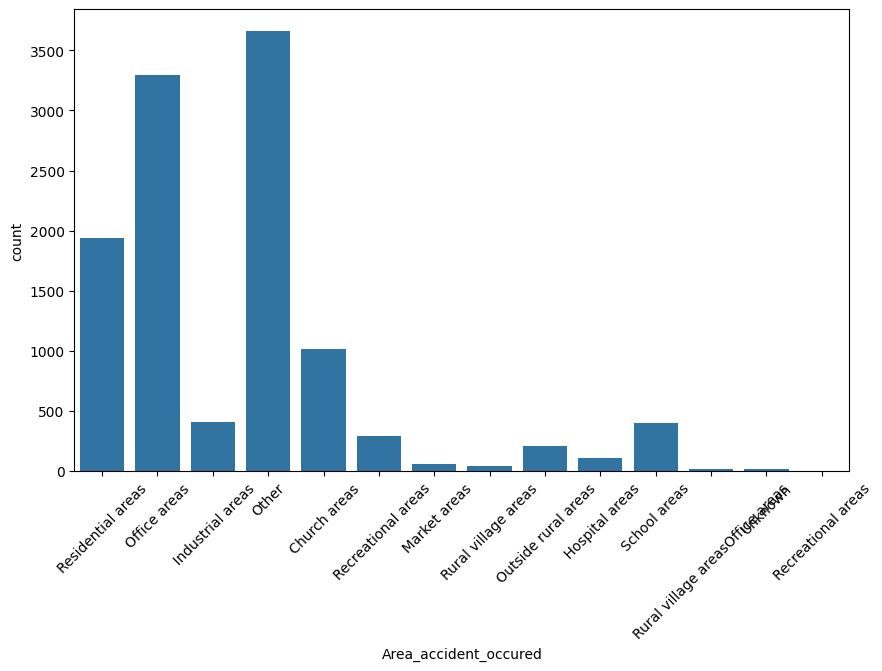

In [33]:
# let's visualize where most accidents occur

plt.figure(figsize=(10, 6))
sns.countplot(x='Area_accident_occured', data=df)
plt.xticks(rotation=45)
plt.show()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11469 entries, 0 to 12315
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Day_of_week                  11469 non-null  object 
 1   Age_band_of_driver           11469 non-null  object 
 2   Sex_of_driver                11469 non-null  object 
 3   Educational_level            11469 non-null  object 
 4   Driving_experience           11469 non-null  object 
 5   Type_of_vehicle              11469 non-null  object 
 6   Service_year_of_vehicle      11469 non-null  float64
 7   Area_accident_occured        11469 non-null  object 
 8   Lanes_or_Medians             11469 non-null  object 
 9   Road_allignment              11469 non-null  object 
 10  Types_of_Junction            11469 non-null  object 
 11  Road_surface_type            11469 non-null  object 
 12  Road_surface_conditions      11469 non-null  object 
 13  Light_conditions     

### Visualize the distribution of key variables (e.g., Age_band_of_driver, Type_of_vehicle).

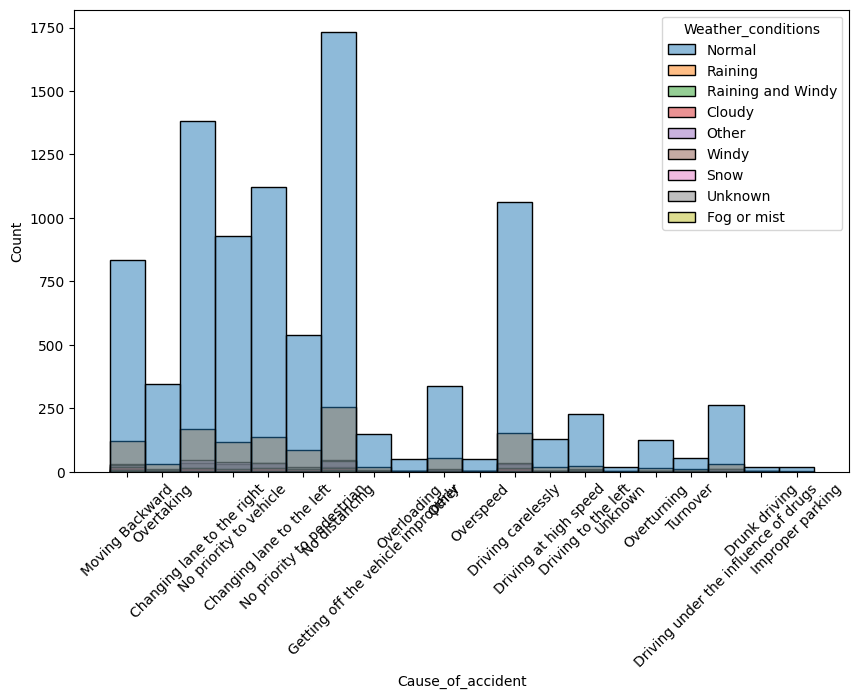

In [35]:
# let's see the distribution of the 'Road_surface_type' with 'Weather_conditions'
plt.figure(figsize=(10, 6))
sns.histplot(x='Cause_of_accident', hue='Weather_conditions', data=df)
plt.xticks(rotation=45)
plt.show()


### Explore relationships between variables (e.g., Age_band_of_driver vs. Accident_severity).


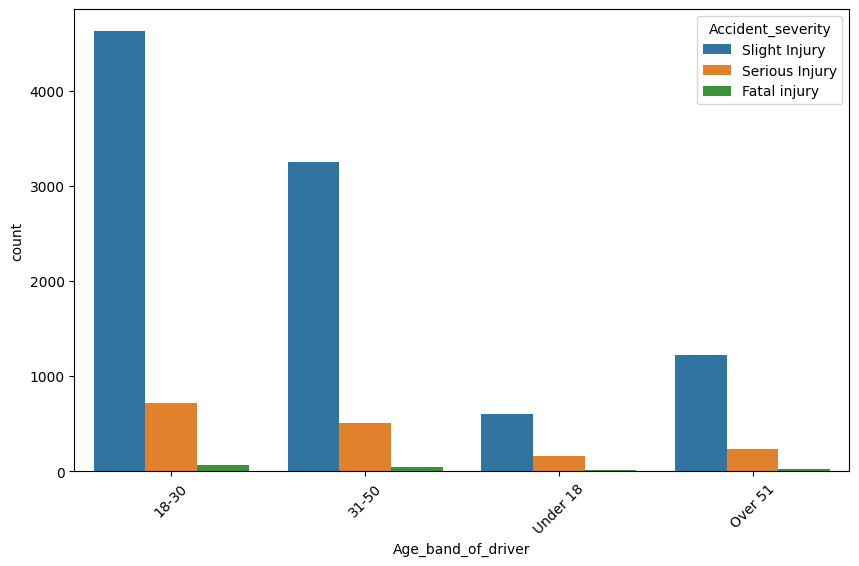

In [36]:
# let's see the relationship between the age of the Age_band_of_driver and the Accident_severity
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_band_of_driver', hue='Accident_severity', data=df)
plt.xticks(rotation=45)
plt.show()

## 3. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

## 4. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>